In [8]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import scipy

In [9]:
image1 = skimage.io.imread('Data-2/cells/9343 AM.bmp', as_gray=True)
image2 = skimage.io.imread('Data-2/cells/10905 JL.bmp', as_gray=True)
image3 = skimage.io.imread('Data-2/cells/43590 AM.bmp', as_gray=True)

In [10]:
imageGT1 = skimage.io.imread('Data-2/cells/9343 AM Edges.bmp', as_gray=True)
imageGT2 = skimage.io.imread('Data-2/cells/10905 JL Edges.bmp', as_gray=True)
imageGT3 = skimage.io.imread('Data-2/cells/43590 AM Edges.bmp', as_gray=True)

def roc(filtered, groundTruth):
    groundTruth = np.logical_not(groundTruth/255)

    TP = np.sum((filtered == 1) & (groundTruth == 1))
    FP = np.sum((filtered == 1) & (groundTruth == 0))
    TN = np.sum((filtered == 0) & (groundTruth == 0))
    FN = np.sum((filtered == 0) & (groundTruth == 1))

    # Compute TPR and FPR
    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    print(f'Sobel: TPR {tpr} FPR {1-fpr}')

    

In [11]:
def zero_cross(image):
    z_c_image = np.zeros(image.shape)
    thresh = np.absolute(image).mean() * 0.75
    h,w = image.shape
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = image[y-1:y+2, x-1:x+2]
            p = image[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thresh) and zeroCross:
                z_c_image[y, x] = 1
    return z_c_image

In [12]:
def roberts_edge_detector(image):
    # Define convolution matrices
    roberts_x = np.array([[1,0],
                         [0,-1]])
    roberts_y = np.array([[0,1],
                         [-1,0]])
    
    #Apply Roberts operators to compute gradients
    edges_x = scipy.ndimage.convolve(image, roberts_x)
    edges_y = scipy.ndimage.convolve(image, roberts_y)

    # Take magnitude of horiz and vert components
    magnitude = np.sqrt(edges_x**2 + edges_y**2)

    return magnitude

In [13]:
roberts_edges_image1 = roberts_edge_detector(image1)
roberts_edges_image2 = roberts_edge_detector(image2)
roberts_edges_image3 = roberts_edge_detector(image3)

In [14]:
# roberts_edges_image1 = zero_cross(roberts_edge_detector(image1))
# roberts_edges_image2 = zero_cross(roberts_edge_detector(image2))
# roberts_edges_image3 = zero_cross(roberts_edge_detector(image3))



th_1 = skimage.filters.threshold_otsu(roberts_edges_image1)
th_2 = skimage.filters.threshold_otsu(roberts_edges_image2)
th_3 = skimage.filters.threshold_otsu(roberts_edges_image3)

print(th_1)
print(th_2)
print(th_3)


thresholded_1 = roberts_edges_image1 > th_1
thresholded_2 = roberts_edges_image2 > th_2
thresholded_3 = roberts_edges_image3 > th_3

roc(thresholded_1, imageGT1)
roc(thresholded_2, imageGT2)
roc(thresholded_3, imageGT3)



0.034641727235675185
0.0332892608368788
0.0166527808362339
Sobel: TPR 0.746111211791712 FPR 0.8755915361948862
Sobel: TPR 0.8601372837974095 FPR 0.8851798975799453
Sobel: TPR 0.6900264934620972 FPR 0.8658758097442575


(-0.5, 1279.5, 1023.5, -0.5)

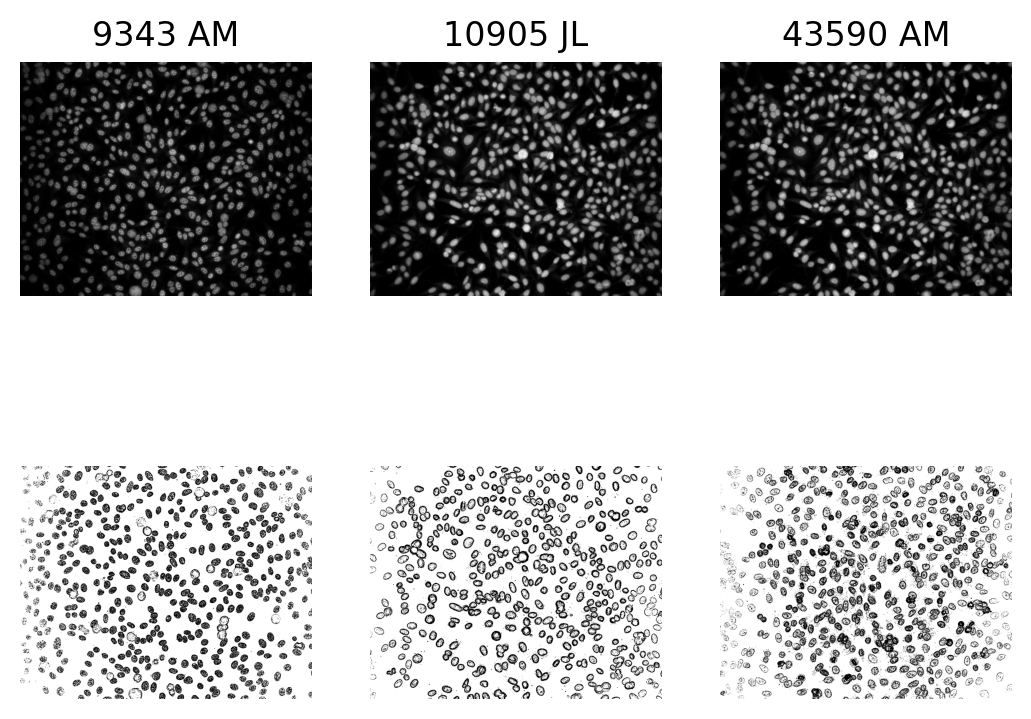

In [15]:
plt.figure(dpi=200)

plt.subplot(2,3,1)
plt.imshow(image1, cmap='gray')
plt.title('9343 AM')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(image2, cmap='gray')
plt.title('10905 JL')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(image2, cmap='gray')
plt.title('43590 AM')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(thresholded_1, cmap='binary')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(thresholded_2, cmap='binary')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(thresholded_3, cmap='binary')
plt.axis('off')

